In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_rows', None)

# **Part 1. [1 pt] Data collection and cleaning:**

a) Adapt provided web-scraping code.

b) Save results of Indeed web-scraping to webscraping_results_assignmnet3.csv file.

c) Read webscraping_results_assignmnet3.csv file to your Jupyter notebook.

In [ ]:
# Import Data Cleaning related package
import re
import html
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
## Read the csv
# Key word for webscrapy is Location=USA, Job_position=Data Scientist
df_ws = pd.read_csv('/content/drive/MyDrive/1624/Ass3/webscraping_results_assignment3.csv',encoding = 'latin1')
## The size of dataset
print("Shape of web_scrapy.csv: ",df_ws.shape)
df_ws.head()

Shape of web_scrapy.csv:  (2987, 9)


,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,Jr. Data Scientist,Talentheed Inc,Remote,4.6,PostedToday,"$56,951 - $119,187 a year","To apply to data sets, create unique data mode...",https://www.indeed.com/company/Talentheed-Inc/...,Responsibilities : -\nCoordinate with differen...
1,Jr. Data Scientist,AffixITPro,Remote,#NUM!,PostedToday,$30 - $40 an hour,The Data Scientist supports the development of...,https://www.indeed.com/company/AffixITPro/jobs...,Job Description\nAffixIT Pro has been awarded ...
2,Data Scientist,BP,"Denver, CO 80201",3.8,PostedPosted 5 days ago,NaN,"In conjunction with Data Engineers, building a...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Job Profile Summary\nResponsible for providing...
3,Data Scientist | Remote-US,IXIS Digital,"Remote in Burlington, VT 05401",#NUM!,PostedPosted 2 days ago,NaN,"Experience working with real-world datasets, i...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Overview\nIXIS is seeking an energetic, innova..."
4,Data Scientist,Macquarie Group Limited,"Philadelphia, NY",3.8,PostedPosted 30+ days ago,"$108,000 - $192,500 a year",Deep practical expertise applying statistical ...,https://www.indeed.com/rc/clk?jk=2222ecfa7ea02...,Join our innovative and collaborative Digital ...


# **Part 2. Exploratory data analysis and feature engineering:**

a) Extract data for technical/hard skills, business/soft skills, position title, company, and any other relevant information from job postings texts.

b) Organize data into logically formatted data structure for clustering analysis

c) Engineer features for clustering analysis

d) Visualize key information (you may consider some of the following visualizations):
i. Wordcloud of technical/hard skills;
ii. Wordcloud of business/soft skills;
iii. Wordcloud of all skills;
iv. Technical/hard skills vs. job titles;
v. Technical/hard skills vs. companies;
vi. Business/soft skills vs. job titles;
vii. Business/soft skills vs. companies;
viii. All skills vs. job titles;
ix. All skills vs. companies.

## Part 2.1 preprocess

In [ ]:
## preprocess the text
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words("english")
def preprocess(text):
  ## Remove uncorrelated word
  text=html.unescape(text)
  text=text.encode('ascii','ignore').decode()
  text=re.sub(r'&|#|@|https?:\S+|http?:\S|[^a-z]+|rt|<[^>]+>', ' ', str(text).lower())
  words=[]
  for word in word_tokenize(text):
    if word not in stop_words: 
     words.append(lemmatizer.lemmatize(word))
  text=' '.join(words)
  return text

In [ ]:
## Apply the preprocess for description and descriptions
df_ws.Descriptions=df_ws.Descriptions.apply(lambda x:preprocess(x))
df_ws.Description=df_ws.Description.apply(lambda x:preprocess(x))
## view the after preprocess dataset
df_ws.head()

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,Jr. Data Scientist,Talentheed Inc,Remote,4.6,PostedToday,"$56,951 - $119,187 a year",apply data set create unique data model algori...,https://www.indeed.com/company/Talentheed-Inc/...,responsibility coordinate different team imple...
1,Jr. Data Scientist,AffixITPro,Remote,#NUM!,PostedToday,$30 - $40 an hour,data scientist suppo development statistical m...,https://www.indeed.com/company/AffixITPro/jobs...,job description affixit pro awarded large empl...
2,Data Scientist,BP,"Denver, CO 80201",3.8,PostedPosted 5 days ago,NaN,conjunction data engineer building managing ne...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,job profile summary responsible providing soun...
3,Data Scientist | Remote-US,IXIS Digital,"Remote in Burlington, VT 05401",#NUM!,PostedPosted 2 days ago,NaN,experience working real world datasets includi...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,overview ixis seeking energetic innovative qua...
4,Data Scientist,Macquarie Group Limited,"Philadelphia, NY",3.8,PostedPosted 30+ days ago,"$108,000 - $192,500 a year",deep practical expe ise applying statistical k...,https://www.indeed.com/rc/clk?jk=2222ecfa7ea02...,join innovative collaborative digital transfor...


In [ ]:
## Check the info
df_ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2987 entries, 0 to 2986
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         2987 non-null   object
 1   Company       2987 non-null   object
 2   Location      2987 non-null   object
 3   Rating        2987 non-null   object
 4   Date          2987 non-null   object
 5   Salary        755 non-null    object
 6   Description   2987 non-null   object
 7   Links         2987 non-null   object
 8   Descriptions  2987 non-null   object
dtypes: object(9)
memory usage: 210.1+ KB


## Part 2.2 Skill extract

In [ ]:
## Define the skill list, with soft and hard skill
skills=['communication','excel','team work','deep learning','artificial intelligence','python','AWS','powerbi','sql','spark','spss','Machine learning',
    'consulting','negotiation','optimization','matlab','hadoop','pm','r','creativity']

In [ ]:
## Default array
default_zero=np.zeros((df_ws.shape[0],len(skills)))
##
default_skill=pd.DataFrame(default_zero,columns=skills)

In [ ]:
## Concat the df_ws with default skill dataframe
df_ws_skill=pd.concat([df_ws,default_skill],axis=1)

In [ ]:
## Feature extraction
## Assign the 1 to the skill if a job posting need this skill
for i in range(df_ws_skill.shape[0]):
  text=df_ws_skill.Description[i]
  text1=df_ws_skill.Descriptions[i]
  # Communicate
  x=re.search(r'communicat\w*',text)
  x=re.search(r'communicat\w*',text1)
  if x:
    df_ws_skill.loc[i,'communication']=1

  #excel
  x=re.search(r'excel\w*',text)
  x=re.search(r'excel\w*',text1)
  if x:
    df_ws_skill.loc[i,'excel']=1

  # team work
  x=re.search(r'team\s*\work',text)
  x=re.search(r'team\s*\work',text1)
  if x:
    df_ws_skill.loc[i,'team work']=1

  # deep learning
  x=re.search(r'deep\s*lear\w*|deep\-lear\w*',text)
  x=re.search(r'deep\s*lear\w*|deep\-lear\w*',text1)
  if x:
    df_ws_skill.loc[i,'deep learning']=1

  ## AI
  x=re.search(r'\s+ai\s+|arti\w*\s*intell\w*',text)
  x=re.search(r'\s+ai\s+|arti\w*\s*intell\w*',text1)  
  if x:
    df_ws_skill.loc[i,'artificial intelligence']=1

  ## py
  x=re.search(r'python',text)
  x=re.search(r'python',text1)
  if x:
    df_ws_skill.loc[i,'python']=1

  ## AWS
  x=re.search(r'aws',text)
  x=re.search(r'aws',text1)
  if x:
    df_ws_skill.loc[i,'AWS']=1

  ## powerbi
  x=re.search(r'powerbi',text)
  x=re.search(r'powerbi',text1)
  if x:
    df_ws_skill.loc[i,'powerbi']=1

  ## sql
  x=re.search(r'sql|structured\s*query\s*language|rdbms',text)
  x=re.search(r'sql|structured\s*query\s*language|rdbms',text1)
  if x:
    df_ws_skill.loc[i,'sql']=1

  ## spark
  x=re.search(r'spark',text)
  x=re.search(r'spark',text1)
  if x:
    df_ws_skill.loc[i,'spark']=1  
  # spss
  x=re.search(r'spss|spss\w*',text)
  x=re.search(r'spss|spss\w*',text1)
  if x:
    df_ws_skill.loc[i,'spss']=1

  # #sas
  # x=re.search(r'sas',text)
  # x=re.search(r'sas',text1)
  # if x:
  #   df_ws_skill.loc[i,'sas']=1
  # Machine learning
  x=re.search(r'machine\s*learn',text)
  x=re.search(r'machine\s*learn',text1)
  if x:
    df_ws_skill.loc[i,'Machine learning']=1  
  ## consult
  x=re.search(r'consult\w*',text)
  x=re.search(r'consult\w*',text1)
  if x:
    df_ws_skill.loc[i,'consulting']=1

  ## nego
  x=re.search(r'negot\w*',text)
  x=re.search(r'negot\w*',text1)
  if x:
    df_ws_skill.loc[i,'negotiation']=1

  ## optimization
  x=re.search(r'optimizat\w*',text)
  x=re.search(r'optimizat\w*',text1)
  if x:
    df_ws_skill.loc[i,'optimization']=1

  ## matlab
  x=re.search(r'matlab',text)
  x=re.search(r'matlab',text1)
  if x:
    df_ws_skill.loc[i,'matlab']=1
  ## hadoop
  x=re.search(r'hadoop',text)
  x=re.search(r'hadoop',text1)
  if x:
    df_ws_skill.loc[i,'hadoop']=1

  ## project management
  x=re.search(r'project\s*man\w*|\s+pm\s+',text)
  x=re.search(r'project\s*man\w*|\s+pm\s+',text1)
  if x:
    df_ws_skill.loc[i,'pm']=1

  ## r
  x=re.search(r'\s+r\s+',text)
  x=re.search(r'\s+r\s+',text1)
  if x:
    df_ws_skill.loc[i,'r']=1

  ## creativity
  x=re.search(r'creat\w*',text)
  x=re.search(r'creat\w*',text1)
  if x:
    df_ws_skill.loc[i,'creativity']=1

In [ ]:
df_ws_skill.drop(['Description','Descriptions'],axis=1,inplace=True)
df_ws_skill.head()

,Title,Company,Location,Rating,Date,Salary,Links,communication,excel,team work,...,spss,Machine learning,consulting,negotiation,optimization,matlab,hadoop,pm,r,creativity
0,Jr. Data Scientist,Talentheed Inc,Remote,4.6,PostedToday,"$56,951 - $119,187 a year",https://www.indeed.com/company/Talentheed-Inc/...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Jr. Data Scientist,AffixITPro,Remote,#NUM!,PostedToday,$30 - $40 an hour,https://www.indeed.com/company/AffixITPro/jobs...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Data Scientist,BP,"Denver, CO 80201",3.8,PostedPosted 5 days ago,NaN,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,Data Scientist | Remote-US,IXIS Digital,"Remote in Burlington, VT 05401",#NUM!,PostedPosted 2 days ago,NaN,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,Data Scientist,Macquarie Group Limited,"Philadelphia, NY",3.8,PostedPosted 30+ days ago,"$108,000 - $192,500 a year",https://www.indeed.com/rc/clk?jk=2222ecfa7ea02...,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
## The counts value of skill been needed
for ski in skills:
 print('\n The value count for skill: ',ski)
 print(df_ws_skill.loc[:,ski].value_counts())


 The value count for skill:  communication
1.0    2211
0.0     776
Name: communication, dtype: int64

 The value count for skill:  excel
0.0    1737
1.0    1250
Name: excel, dtype: int64

 The value count for skill:  team work
0.0    2537
1.0     450
Name: team work, dtype: int64

 The value count for skill:  deep learning
0.0    2563
1.0     424
Name: deep learning, dtype: int64

 The value count for skill:  artificial intelligence
0.0    2331
1.0     656
Name: artificial intelligence, dtype: int64

 The value count for skill:  python
1.0    2036
0.0     951
Name: python, dtype: int64

 The value count for skill:  AWS
0.0    2441
1.0     546
Name: AWS, dtype: int64

 The value count for skill:  powerbi
0.0    2693
1.0     294
Name: powerbi, dtype: int64

 The value count for skill:  sql
1.0    1693
0.0    1294
Name: sql, dtype: int64

 The value count for skill:  spark
0.0    2543
1.0     444
Name: spark, dtype: int64

 The value count for skill:  spss
0.0    2964
1.0      23
Name: s

## *Part 2.3 Data visualization*

In [ ]:
from collections import defaultdict,Counter
from plotly import graph_objs as go

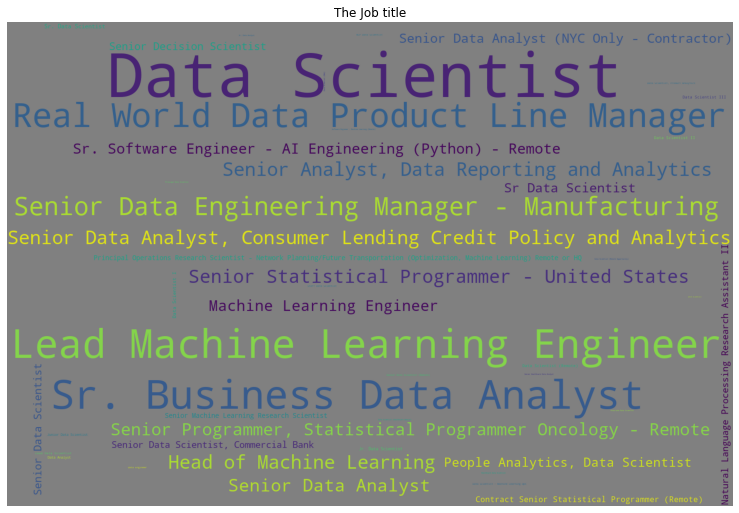

In [ ]:
## The wordcloud for job titles
## The Data Scientist is most frequent job title
title_sa=Counter(df_ws_skill.Title)
wc = WordCloud(background_color='grey',width=1500,height=1000,max_words=50).generate_from_frequencies(title_sa)
plt.figure(figsize=(13, 13))
plt.imshow(wc)
plt.title('The Job title')
plt.axis('off')
plt.show()

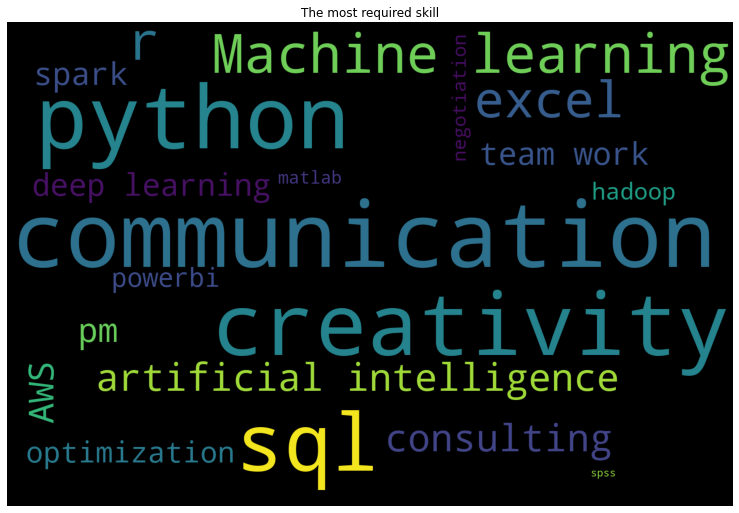

In [ ]:
## Wordcloud for different skills
dict_skill=defaultdict(int)
for i in skills:
  dict_skill[i]=df_ws_skill[df_ws_skill[i]==1].shape[0]
wc = WordCloud(background_color='black',width=1500,height=1000).generate_from_frequencies(dict_skill)
plt.figure(figsize=(13, 13))
plt.imshow(wc)
plt.title('The most required skill')
plt.axis('off')
plt.show()

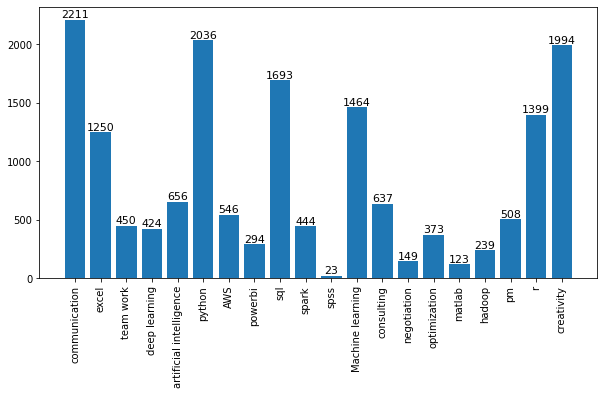

In [ ]:
## The frequency of a skill been needed
plt.figure(figsize=(10, 5))
plt.bar(range(len(dict_skill)), list(dict_skill.values()), align='center')
plt.xticks(range(len(dict_skill)), list(dict_skill.keys()))
plt.xticks(rotation=90)
for a,b in zip(range(len(dict_skill)), list(dict_skill.values())):  
 plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)  
plt.show()

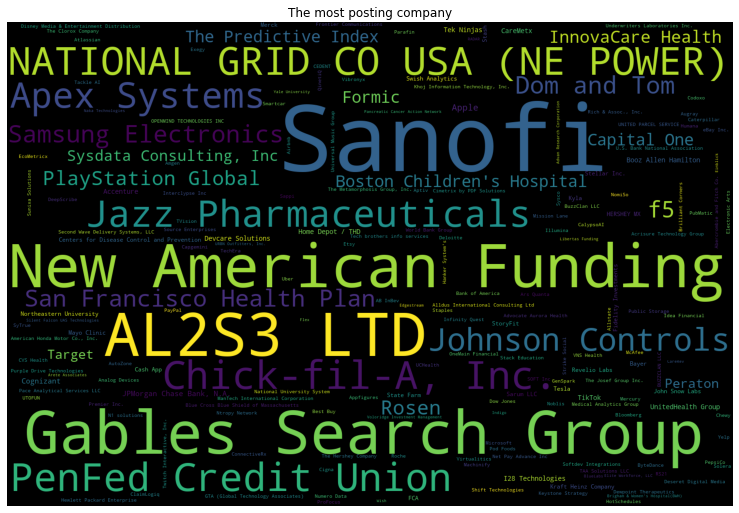

In [ ]:
## wordcloud for company by the number of job posting
## Sanofi post most jobs in the indeedD
dict_company=df_ws_skill.Company.value_counts()
wc = WordCloud(background_color='black',width=1500,height=1000).generate_from_frequencies(dict_company)
plt.figure(figsize=(13, 13))
plt.imshow(wc)
plt.title('The most posting company')
plt.axis('off')
plt.show()

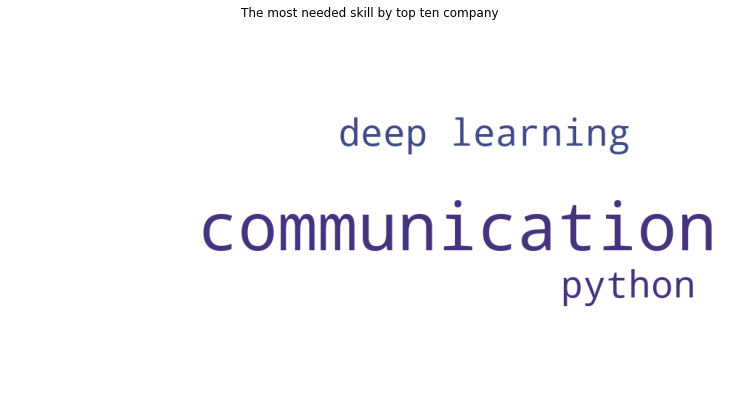

In [ ]:
# The most required skill by top ten most posting company
top_10=dict_company.index[0:10]
skill_need=[]
for company in top_10:
  ski=df_ws_skill[df_ws_skill['Company']==company].loc[:,skills].sum().index[df_ws_skill[df_ws_skill['Company']==company].loc[:,skills].sum().argmax()]
  skill_need.append(ski)
wc=WordCloud(background_color='white',width=1000, height=500).generate_from_frequencies(Counter(skill_need))
plt.figure(figsize=(13, 13))
plt.imshow(wc)
plt.title('The most needed skill by top ten company')
plt.axis('off')
plt.show()

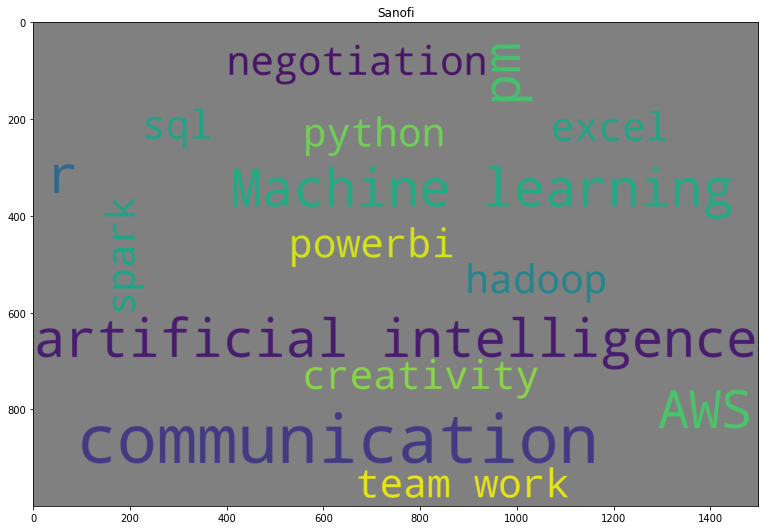

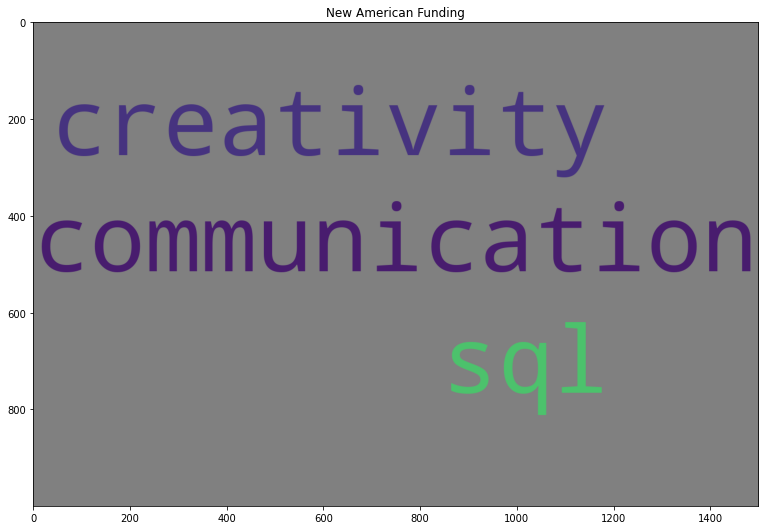

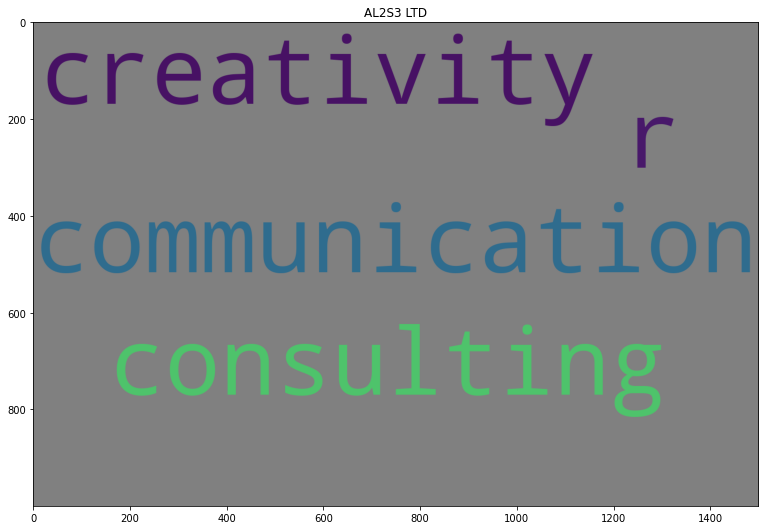

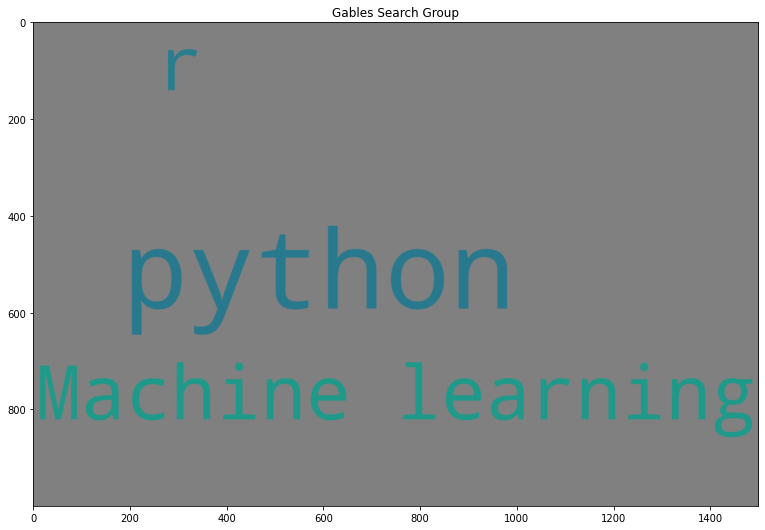

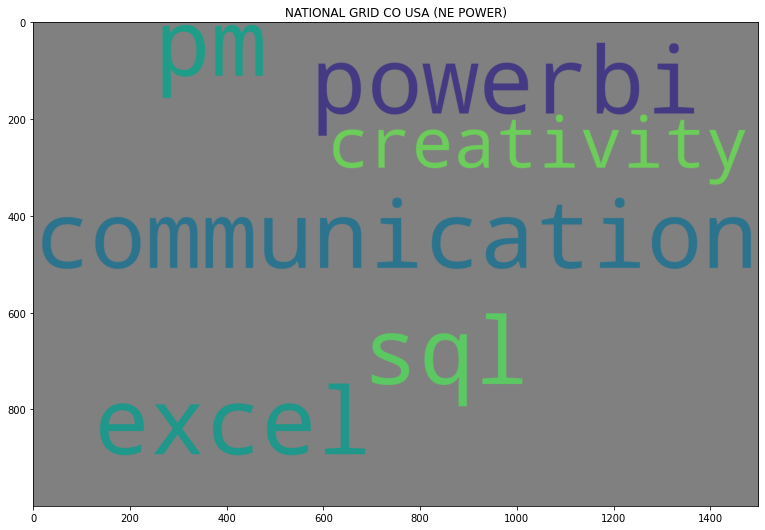

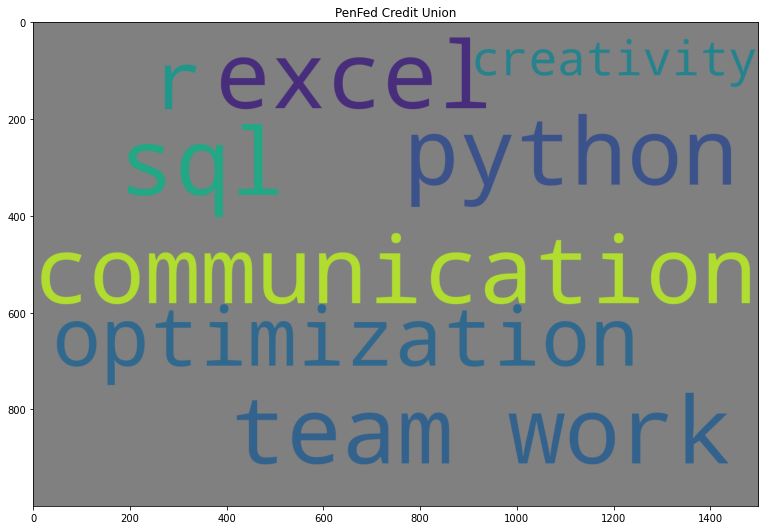

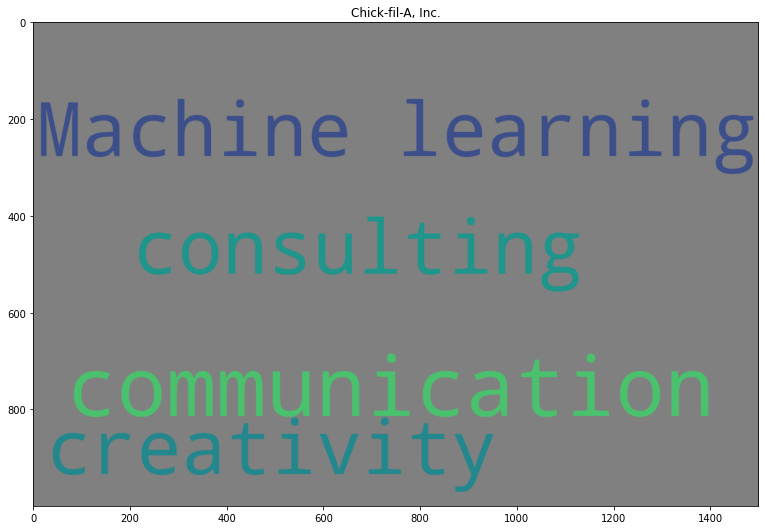

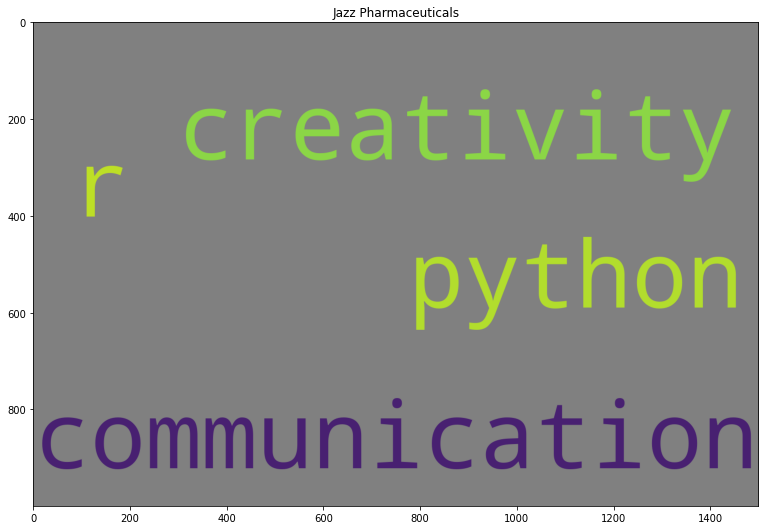

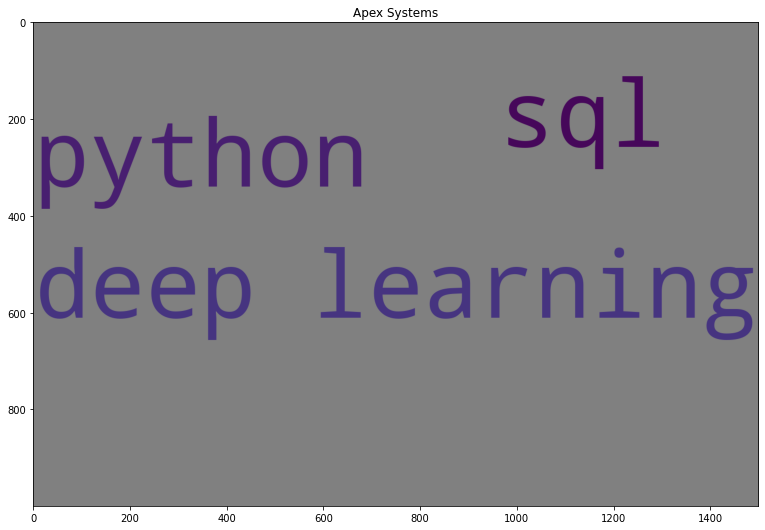

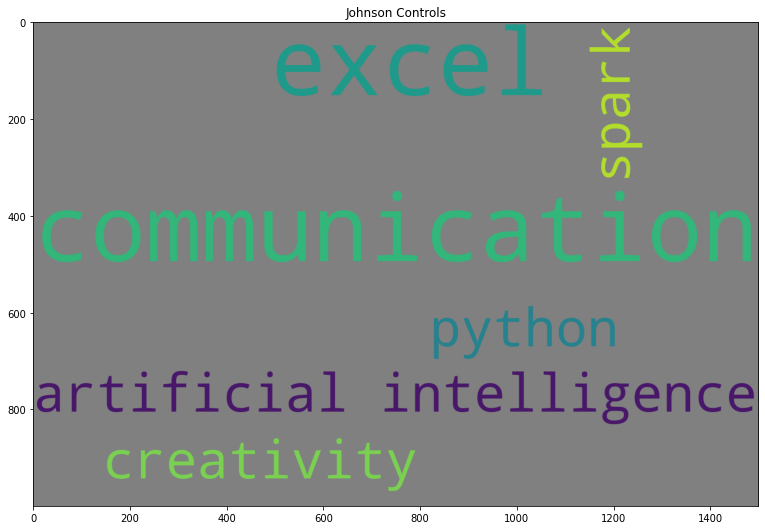

In [ ]:
## The skills most required by each top ten company
top_10=dict_company.index[0:10]
for company in top_10:
  ski=df_ws_skill[df_ws_skill['Company']==company].loc[:,skills].sum()
  wc = WordCloud(background_color='grey',width=1500,height=1000).generate_from_frequencies(ski)
  plt.figure(figsize=(13, 13))
  plt.imshow(wc)
  plt.title(company)
  plt.show()

## *Part 2.4 Dimension reduction and Final selection of data for cluster*

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Treat the skill as row and each job posting required this skill or not as the columns. 
df_skill=df_ws_skill.loc[:,skills].T
df_skill

,0,1,2,3,4,5,6,7,8,9,...,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986
communication,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
excel,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
team work,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
deep learning,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
artificial intelligence,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
python,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
AWS,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
powerbi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
sql,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
spark,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
##PCA STANDRADIZE
n1=StandardScaler()
scaled_df=n1.fit_transform(df_skill)
## Apply pca
pca = PCA(n_components=10) 
pca_df = pca.fit_transform(scaled_df)

# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\nTotal Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.32869492 0.12946252 0.10034157 0.07955362 0.06703802 0.05406229
 0.04874105 0.04037879 0.02970271 0.02496419]

Total Variance Explained: 90.29


In [ ]:
## Top Ten Principal component
pca_df=pd.DataFrame(pca_df,index=df_skill.index)
pca_df

,0,1,2,3,4,5,6,7,8,9
communication,66.645923,-27.597058,-12.725544,-5.168293,-11.153426,-11.328194,7.749755,-11.339710,8.733345,20.239640
excel,18.307853,-17.497630,19.771460,15.249989,-13.600909,28.270637,28.885008,12.189953,-1.515105,-4.693083
team work,-17.982853,-5.844517,-1.421367,5.141321,1.238595,22.444024,-17.133235,5.641831,2.109658,7.943469
deep learning,-20.654908,16.646228,7.081603,-18.911035,20.357076,5.513988,2.974444,-10.553514,28.344049,-0.557926
artificial intelligence,-15.577135,5.145191,-12.608963,-6.573926,-22.513483,4.036907,12.529937,-16.990631,1.127061,0.705142
python,49.829786,53.175161,14.492830,6.174413,4.853428,8.690266,4.797797,-13.554503,-4.308275,-5.020406
AWS,-20.176117,6.667587,-9.889854,-8.356398,-11.326064,2.338061,-9.932826,4.105715,1.042753,-11.414590
powerbi,-23.974679,-7.742331,8.166689,-6.161262,-10.656876,-15.022499,-0.504756,3.052319,-2.082703,-1.470838
sql,41.757652,3.735628,47.080188,-20.249029,1.341570,-15.848438,-7.736552,17.361102,-0.799193,1.243050
spark,-19.682658,5.988690,1.749359,-7.980789,-8.632200,-6.906380,2.947288,-17.696074,-17.822643,-5.318502


# **Part 3. Hierarchical clustering implementation:**

a) Implement hierarchical clustering algorithm.

b) Generate and plot a dendrogram from hierarchical clustering algorithm.

c) Decide about a number of clusters that you would like to select keeping in mind that you need  to  design  a  sequence  of  8-12  courses.  Justify  and  explain  your  clusters  in  one paragraph. 

In [ ]:
## Calculate the distance by Euclidean distance
def getdismatrix(df):
  len=df.shape[0]
  width=df.shape[1]
  default=np.zeros([len,len])
  dis_matrix=pd.DataFrame(default,index=pca_df.index,columns=pca_df.index)
  for i in range(len):
   for j in range(len):
    dist = np.linalg.norm(df.iloc[i,:] - df.iloc[j,:])
    dis_matrix.iloc[i,j]=dist
  return dis_matrix

In [ ]:
distance_matrix=getdismatrix(pca_df)

In [ ]:
distance_matrix

,communication,excel,team work,deep learning,artificial intelligence,python,AWS,powerbi,sql,spark,spss,Machine learning,consulting,negotiation,optimization,matlab,hadoop,pm,r,creativity
communication,0.000000,84.963775,101.378457,110.388861,94.082748,95.297498,101.729546,99.697896,85.929743,101.008613,106.451172,97.882247,96.488774,103.832889,100.845273,107.329286,102.216307,96.063741,90.640828,61.205488
excel,84.963775,0.000000,67.407721,87.366247,69.866434,89.462549,75.763496,72.661274,81.797497,76.601962,74.285706,97.718744,78.030790,69.904140,68.254749,69.448548,77.845777,68.139099,84.146627,88.754990
team work,101.378457,67.407721,0.000000,56.618794,64.472966,98.158388,34.687473,48.216439,91.798645,53.359889,35.269848,81.190837,70.695362,25.810132,23.944093,38.897966,45.509738,45.043487,76.562686,91.509200
deep learning,110.388861,87.366247,56.618794,0.000000,61.983268,90.861395,52.203170,55.552287,90.837223,57.966482,44.469695,83.712434,72.714380,49.031744,55.276451,47.017294,53.322766,62.340391,94.853260,106.557895
artificial intelligence,94.082748,69.866434,64.472966,61.983268,0.000000,95.545359,43.491627,46.855555,96.633565,49.277880,59.496159,75.107572,81.810319,53.250316,70.045456,62.207315,55.201595,39.118424,88.881614,95.636718
python,95.297498,89.462549,98.158388,90.861395,95.545359,0.000000,93.674600,101.845749,78.829520,89.576924,101.664843,84.094245,106.168119,104.715896,92.600260,98.442406,96.485398,104.726150,77.842044,100.039717
AWS,101.729546,75.763496,34.687473,52.203170,43.491627,93.674600,0.000000,30.880277,88.723233,35.522624,34.219123,66.230656,70.093002,27.666255,41.383340,38.757073,30.395530,27.368101,75.574771,94.422500
powerbi,99.697896,72.661274,48.216439,55.552287,46.855555,101.845749,30.880277,0.000000,83.635956,29.490556,27.719190,85.339682,63.478022,30.860963,46.132963,31.170839,18.346383,22.396643,81.741107,100.910432
sql,85.929743,81.797497,91.798645,90.837223,96.633565,78.829520,88.723233,83.635956,0.000000,89.301606,92.146824,102.620592,98.411352,95.264408,87.841678,89.298021,87.326590,87.014758,95.316788,89.196801
spark,101.008613,76.601962,53.359889,57.966482,49.277880,89.576924,35.522624,29.490556,89.301606,0.000000,35.430320,80.363582,68.041034,43.699068,43.210230,39.083085,21.781369,43.855476,83.121560,98.682049


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [ ]:
model = AgglomerativeClustering(n_clusters=8, affinity='precomputed',linkage='average')
model.fit(distance_matrix)

AgglomerativeClustering(affinity='precomputed', linkage='average', n_clusters=8)

In [ ]:
## Combine the column 'cluster' to distance_matrix to get the agg_res
cluster=pd.DataFrame(model.labels_.T,index=distance_matrix.index,columns=['cluster'])
agg_res=pd.concat([distance_matrix,cluster],axis=1)
agg_res

,communication,excel,team work,deep learning,artificial intelligence,python,AWS,powerbi,sql,spark,...,Machine learning,consulting,negotiation,optimization,matlab,hadoop,pm,r,creativity,cluster
communication,0.000000,84.963775,101.378457,110.388861,94.082748,95.297498,101.729546,99.697896,85.929743,101.008613,...,97.882247,96.488774,103.832889,100.845273,107.329286,102.216307,96.063741,90.640828,61.205488,0
excel,84.963775,0.000000,67.407721,87.366247,69.866434,89.462549,75.763496,72.661274,81.797497,76.601962,...,97.718744,78.030790,69.904140,68.254749,69.448548,77.845777,68.139099,84.146627,88.754990,6
team work,101.378457,67.407721,0.000000,56.618794,64.472966,98.158388,34.687473,48.216439,91.798645,53.359889,...,81.190837,70.695362,25.810132,23.944093,38.897966,45.509738,45.043487,76.562686,91.509200,1
deep learning,110.388861,87.366247,56.618794,0.000000,61.983268,90.861395,52.203170,55.552287,90.837223,57.966482,...,83.712434,72.714380,49.031744,55.276451,47.017294,53.322766,62.340391,94.853260,106.557895,1
artificial intelligence,94.082748,69.866434,64.472966,61.983268,0.000000,95.545359,43.491627,46.855555,96.633565,49.277880,...,75.107572,81.810319,53.250316,70.045456,62.207315,55.201595,39.118424,88.881614,95.636718,1
python,95.297498,89.462549,98.158388,90.861395,95.545359,0.000000,93.674600,101.845749,78.829520,89.576924,...,84.094245,106.168119,104.715896,92.600260,98.442406,96.485398,104.726150,77.842044,100.039717,5
AWS,101.729546,75.763496,34.687473,52.203170,43.491627,93.674600,0.000000,30.880277,88.723233,35.522624,...,66.230656,70.093002,27.666255,41.383340,38.757073,30.395530,27.368101,75.574771,94.422500,1
powerbi,99.697896,72.661274,48.216439,55.552287,46.855555,101.845749,30.880277,0.000000,83.635956,29.490556,...,85.339682,63.478022,30.860963,46.132963,31.170839,18.346383,22.396643,81.741107,100.910432,1
sql,85.929743,81.797497,91.798645,90.837223,96.633565,78.829520,88.723233,83.635956,0.000000,89.301606,...,102.620592,98.411352,95.264408,87.841678,89.298021,87.326590,87.014758,95.316788,89.196801,7
spark,101.008613,76.601962,53.359889,57.966482,49.277880,89.576924,35.522624,29.490556,89.301606,0.000000,...,80.363582,68.041034,43.699068,43.210230,39.083085,21.781369,43.855476,83.121560,98.682049,1


In [ ]:
Course_l=['Course 1','Course 2','Course 3','Course 4','Course 5','Course 6','Course 7','Course 8']
CourseTable=pd.DataFrame(np.zeros([int(len(skills)),8]),columns=Course_l)

In [ ]:
curriculum=[]
for course in range(8):
  curriculum.append(agg_res[agg_res.cluster==course].index)
Course_l=['Course 1','Course 2','Course 3','Course 4','Course 5','Course 6','Course 7','Course 8']
CourseTable_agglomerative=pd.DataFrame(np.zeros([13,8]),columns=Course_l) 
for i,contents in enumerate(curriculum):
  for j,content in enumerate(contents):
   CourseTable_agglomerative.iloc[j,i]=content
## If dont know replace 0 the table will show nah with 0
CourseTable_agglomerative.replace(0,'',inplace=True)
CourseTable_agglomerative

,Course 1,Course 2,Course 3,Course 4,Course 5,Course 6,Course 7,Course 8
0,communication,team work,r,consulting,Machine learning,python,excel,sql
1,creativity,deep learning,,,,,,
2,,artificial intelligence,,,,,,
3,,AWS,,,,,,
4,,powerbi,,,,,,
5,,spark,,,,,,
6,,spss,,,,,,
7,,negotiation,,,,,,
8,,optimization,,,,,,
9,,matlab,,,,,,


If we automate generate the course table by agglomerative by setting the cluster number=8, some topic may be cluster into one cluster. 

<ipython-input-217-5732d47c547a>:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dend = shc.dendrogram(shc.linkage(distance_matrix, method='average'),labels=label,orientation='left')


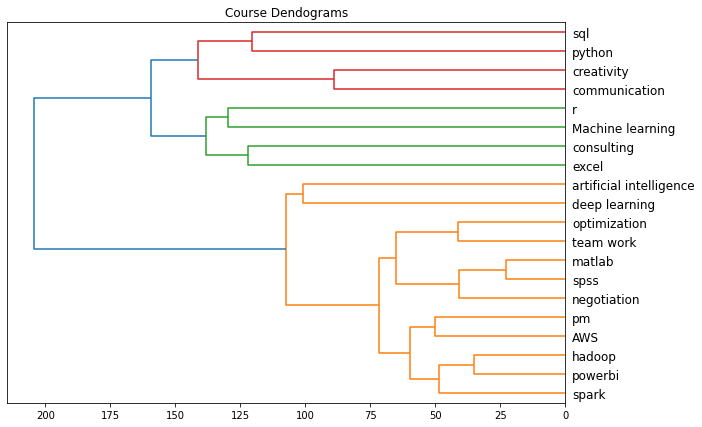

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Course Dendograms")
label=distance_matrix.index
dend = shc.dendrogram(shc.linkage(distance_matrix, method='average'),labels=label,orientation='left')

In [ ]:
## Base on the denogram, we can find that soft skills is close to each others. The hard skill like spark , hadoop will be cluster into one cluster.

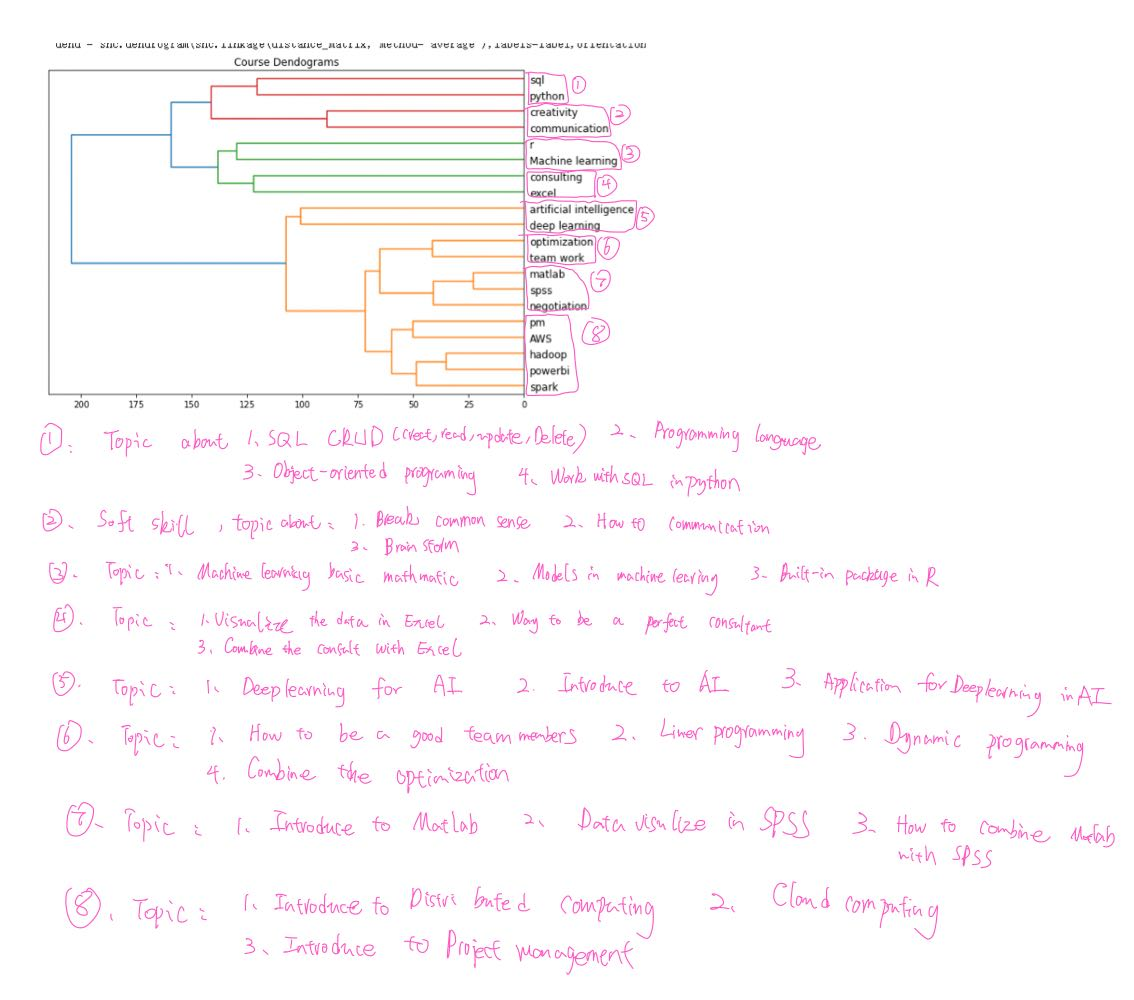

# **Part 4 K-means or DBSCAN clustering implementation:** 
a) Implement k-means clustering algorithm or DBSCAN clustering algorithm. 

b) Decide about a number of clusters that you would like to select keeping in mind that you need to design a sequence of 8-12 courses. For instance, you can use the elbow method to determine  the  optimal  number  of  clusters  for  k-means  clustering  or  experiment  with different eps values if using DBSCAN clustering. Justify and explain your clusters in one paragraph. 

c) Visualize your clustering results, e.g., using a labeled scatterplot from k-means clustering algorithm or DBSCAN clustering algorithm.

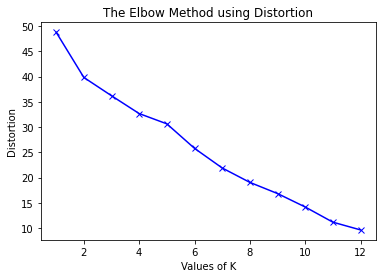

In [ ]:
## From 8 -12 the Distortion dont decrease significant, so 8 is enough
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mappingl={}
mapping2 ={}
K = range(1,13)

for k in K:
 kmeanModel = KMeans(n_clusters=k).fit(pca_df)

 distortions.append(sum(np.min(cdist(pca_df, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / pca_df.shape[0])
 inertias.append(kmeanModel.inertia_)
 mappingl[k] = sum(np.min(cdist(pca_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / pca_df.shape[0]
 mapping2[k] = kmeanModel.inertia_

plt.plot(K,distortions,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
## Combine the column 'cluster' to pca_df to get the k_mean_res
kmeans = KMeans(n_clusters=8,random_state=0).fit(pca_df)
cluster=pd.DataFrame(kmeans.labels_.T,index=pca_df.index,columns=['cluster'])
k_mean_res=pd.concat([pca_df,cluster],axis=1)
k_mean_res

,0,1,2,3,4,5,6,7,8,9,cluster
communication,66.645923,-27.597058,-12.725544,-5.168293,-11.153426,-11.328194,7.749755,-11.339710,8.733345,20.239640,2
excel,18.307853,-17.497630,19.771460,15.249989,-13.600909,28.270637,28.885008,12.189953,-1.515105,-4.693083,7
team work,-17.982853,-5.844517,-1.421367,5.141321,1.238595,22.444024,-17.133235,5.641831,2.109658,7.943469,1
deep learning,-20.654908,16.646228,7.081603,-18.911035,20.357076,5.513988,2.974444,-10.553514,28.344049,-0.557926,1
artificial intelligence,-15.577135,5.145191,-12.608963,-6.573926,-22.513483,4.036907,12.529937,-16.990631,1.127061,0.705142,5
python,49.829786,53.175161,14.492830,6.174413,4.853428,8.690266,4.797797,-13.554503,-4.308275,-5.020406,6
AWS,-20.176117,6.667587,-9.889854,-8.356398,-11.326064,2.338061,-9.932826,4.105715,1.042753,-11.414590,5
powerbi,-23.974679,-7.742331,8.166689,-6.161262,-10.656876,-15.022499,-0.504756,3.052319,-2.082703,-1.470838,5
sql,41.757652,3.735628,47.080188,-20.249029,1.341570,-15.848438,-7.736552,17.361102,-0.799193,1.243050,0
spark,-19.682658,5.988690,1.749359,-7.980789,-8.632200,-6.906380,2.947288,-17.696074,-17.822643,-5.318502,5


In [ ]:
k_mean_res.cluster

communication              2
excel                      7
team work                  1
deep learning              1
artificial intelligence    5
python                     6
AWS                        5
powerbi                    5
sql                        0
spark                      5
spss                       1
Machine learning           3
consulting                 1
negotiation                1
optimization               1
matlab                     1
hadoop                     5
pm                         5
r                          4
creativity                 2
Name: cluster, dtype: int32

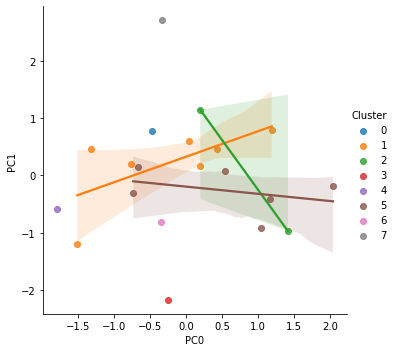

In [ ]:
##PCA STANDRADIZE
n1=StandardScaler()
x_scaled=n1.fit_transform(k_mean_res.iloc[:,0:-1])
## Apply pca
pca = PCA(n_components=2) 
x_pca_kmeans_res = pca.fit_transform(x_scaled)
## Generate the df for scatter
k_mean_res_pca=pd.DataFrame(x_pca_kmeans_res)
k_mean_res_pca['Cluster']=k_mean_res.cluster.values
k_mean_res_pca.columns=['PC0','PC1','Cluster']
## Plot the diagram
sns.lmplot(x='PC0', y='PC1',hue='Cluster',data=k_mean_res_pca,fit_reg=True)
plt.show()

In [ ]:
## Generate the coursetable by k-means cluster by set the cluster to 8
curriculum=[]
for course in range(8):
  curriculum.append(k_mean_res[k_mean_res.cluster==course].index)
Course_l=['Course 1','Course 2','Course 3','Course 4','Course 5','Course 6','Course 7','Course 8']
CourseTable_kmeans=pd.DataFrame(np.zeros([13,8]),columns=Course_l) 
for i,contents in enumerate(curriculum):
  for j,content in enumerate(contents):
   CourseTable_kmeans.iloc[j,i]=content
   
CourseTable_kmeans.replace(0,'',inplace=True)
CourseTable_kmeans

,Course 1,Course 2,Course 3,Course 4,Course 5,Course 6,Course 7,Course 8
0,sql,team work,communication,Machine learning,r,artificial intelligence,python,excel
1,,deep learning,creativity,,,AWS,,
2,,spss,,,,powerbi,,
3,,consulting,,,,spark,,
4,,negotiation,,,,hadoop,,
5,,optimization,,,,pm,,
6,,matlab,,,,,,
7,,,,,,,,
8,,,,,,,,
9,,,,,,,,


# **Part 5 Interpretation of results, discussion and final course curriculum:** 

Separately  visualize  course  curricula  (course  names  and  topics  taught  in  each  course)  from Section 3 (hierarchical clustering algorithm) and from Section 4 (second clustering algorithm). For each course include 3-8 topics (based on skills) that should be taught in each course. Discuss and compare your course curriculum from Section 3 and from Section 4. Present and justify your final course  curriculum.  You  may  select  curriculum  from  Section 3  or  from  Section 4  as  your  final course  curriculum.

If you design  and justify a creative  way to combine results of two clustering 
algorithms into final course curriculum you will get one bonus point (your max assignment mark cannot exceed 15 pts, including bonus). 
 
Insufficient discussion will lead to the deduction of marks.  

In [ ]:
## Course table from kmeans
CourseTable_kmeans

,Course 1,Course 2,Course 3,Course 4,Course 5,Course 6,Course 7,Course 8
content,sql,team work,communication,Machine learning,r,artificial intelligence,python,excel
content,,deep learning,creativity,,,AWS,,
content,,spss,,,,powerbi,,
content,,consulting,,,,spark,,
content,,negotiation,,,,hadoop,,
content,,optimization,,,,pm,,
content,,matlab,,,,,,
content,,,,,,,,
content,,,,,,,,
content,,,,,,,,


**Analysis for K-means**

**Course 1：**

In **SQL** learning, students need to learn topics 1. Basic create, delete, update, read statements and functions, including select, where, group by, having, order by, delete, insert, join, update, etc. 2. Familiar with how to optimize SQL statements in order to achieve the highest query efficiency, understand the concepts of transactions, locks, indexes, constraints, views, metadata, etc., and learn to use tools such as hive sql, spark sql, pymysql, etc.

**Course 2：**

In the study of **Team work**, the topics that students need to learn are 1. Effective communication 2. Collaboration skills enable people and teams to cooperate with each other to achieve common goals 3. Active listening 4. Be Aware of Team Dynamics 5. Conflict Management

In **Deep Learning**, students need to learn 1. Basic knowledge of "Probability/Statistics", "Linear Algebra", and "Calculus". 2. Different deep learning frameworks, such as PaddlePaddle, Tensorflow, Caffe, Theano, MXNet, Torch and PyTorch, and their different advantages. 3. Typical deep learning algorithms, such as CNN, RNN, GANS, RL. As the course progresses, their variants such as LSTM can be introduced.

**SPSS** statistical analysis software is the main tool for data analysis. The topics that students need to learn are 1. Basic statistical knowledge, such as parameter testing, variance analysis, regression analysis 2. Data import and preprocessing. 3. The way to work with python

In **Consulting**, students need to learn 1. The content of clearly expressing data. 2. How to design a Powerpoint. 3. Personal brand and networking skills.

In the study of **Negotiation**, the topics that students need to learn are 1. Negotiation skills and mastery of negotiation psychology 2. Effective communication and listening 3. Effective judgment of the type of negotiating object for negotiation

In the **Optimization** problem, the topics that students need to learn are 1. Gradient-based optimization 2. Function fitting problem 3. Global optimization problem 4. Dynamic programming.

**Course 3**

Strengthening **Communication** skills can effectively enhance efficiency, and students need to learn 1. Talk in a way that others are willing to listen to. 2. Listen the way others want to talk. 3. Create an emotional connection. 4. Read body language. 5. Clarify communication intent. 6. Exercise the ability of active listening.

**Creativity** is an important but difficult skill to teach. Students need to learn 1. Break common sense and challenge assumptions. 2. Expand the scope of problem setting. 3. Phrasing the problem in a different way. 4. Absorb more information and broaden your thinking. 5. Reasoning by analogy. 6. Brainstorm.

**Course 4：**

In **Machine Learning**, the topics that students need to learn are 1. Mathematical knowledge, such as statistical analysis, calculus, linear algebra, statistics 2. Regression models, such as linear regression, Logistic regression, principal component analysis, factor analysis, Ridge regression, LASSO 3. Classification models, such as decision trees (Advaned about bagging, boost), Naive Bayesian, Bayesian belief network, support vector machine 4. Deep learning 5. Reinforcement learning

**Course 5：**

**R** is a powerful data science tool. The topic students need to learn includes 1. Data structure 2. Variable type 3. Data import/export 4. Data merging and appending 5. Length and width conversion 6. Data indexing, slicing, aggregation 7. Regular expressions 8. Matching and replacement, imputation of missing values, deduplication and sorting 9. Graphic grammar

**Course 6:**

In **Artificial Intelligence**, the topics that students need to learn are 1. Mathematical foundation, such as advanced mathematics, linear algebra, and probability theory. 2. Basic computer knowledge, such as programming language, algorithm design, data structure 3. Artificial intelligence platform 4. Basic artificial intelligence applications, such as computer vision, natural language processing

**AWS** is the world's most comprehensive and widely used cloud platform. The skills that students need to learn are 1. Basic linux knowledge 2. Introduction to cloud computing 3. Basic operation in AWS 4.integrate project to cloud platform

**PowerBI** is a popular data visualization tool. The topics that students need to learn are 1. Data import 2. PowerQuery 3. PowerPivot 4. PowerView

**Spark** is a cluster computing framework. The topics that students need to learn are 1. Scala language, object-oriented programming, functional programming 2. Spark SQL 3. Spark Streaming 4. MLlib 5. Graph X

**Hadoop** is a big data framework and a distributed computing solution. The topics that students need to learn are 1. HDFS 2. MapReduce

**Project management**, the topics that students need to learn are 1. Initiation stage 2. Planning stage 3. Execution phase 4. Monitoring phase 5. Closing phase

**Course 7:** 

In **Python**, students need to understand 1. What are variables, algorithms, and interpreters. 2. Python basic data types. 3. What is object-oriented programming. 4. Operation methods of lists and tuples. 5. Master the use of statements such as if, else, elif, while, for, continue, break and list comprehension, as well as exception handling in programs.

**Course 8:**

In **Excel**, the skills that students need to learn are 1. Basic operations, such as typesetting, cells, data validation/filtering/sorting, sequence, search and replace, file protection/printing 2. Commonly used mathematical functions, such as SUM, SUMIF, SUMIFS, ROUND, MOD, INT and references 3. Diagram basics

**Analysis for Agglomerative:**

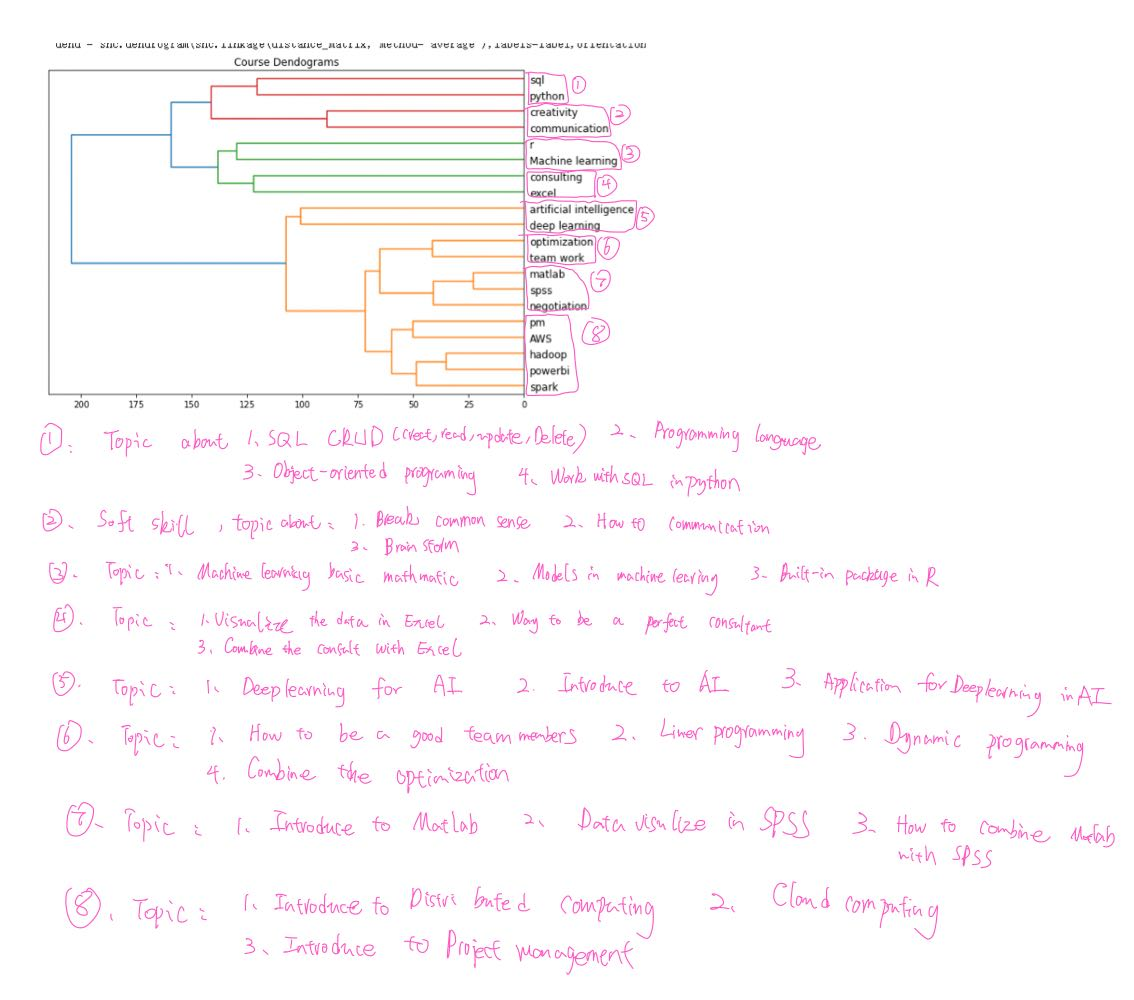

In [ ]:
## Course table from agglomerative
CourseTable_agglomerative

,Course 1,Course 2,Course 3,Course 4,Course 5,Course 6,Course 7,Course 8
0,communication,r,team work,consulting,sql,python,excel,Machine learning
1,creativity,,deep learning,,,,,
2,,,artificial intelligence,,,,,
3,,,AWS,,,,,
4,,,powerbi,,,,,
5,,,spark,,,,,
6,,,spss,,,,,
7,,,negotiation,,,,,
8,,,optimization,,,,,
9,,,matlab,,,,,


**Analysis for agglomerative:**

***Course 1:***

Strengthening **Communication** skills can effectively enhance efficiency, and students need to learn 1. Talk in a way that others are willing to listen to. 2. Listen the way others want to talk. 3. Create an emotional connection. 4. Read body language. 5. Clarify communication intent. 6. Exercise the ability of active listening.

***Course 2:***

**R** is a powerful data science tool. The topic students need to learn includes 1. Data structure 2. Variable type 3. Data import/export 4. Data merging and appending 5. Length and width conversion 6. Data indexing, slicing, aggregation 7. Regular expressions 8. Matching and replacement, imputation of missing values, deduplication and sorting 9. Graphic grammar
**Creativity** is an important but difficult skill to teach. Students need to learn 1. Break common sense and challenge assumptions. 2. Expand the scope of problem setting. 3. Phrasing the problem in a different way. 4. Absorb more information and broaden your thinking. 5. Reasoning by analogy. 6. Brainstorm.

***Course 3:***

In the study of **Team work**, the topics that students need to learn are 1. Effective communication 2. Collaboration skills enable people and teams to cooperate with each other to achieve common goals 3. Active listening 4. Be Aware of Team Dynamics 5. Conflict Management

In **Deep Learning**, students need to learn 1. Basic knowledge of "Probability/Statistics", "Linear Algebra", and "Calculus". 2. Different deep learning frameworks, such as PaddlePaddle, Tensorflow, Caffe, Theano, MXNet, Torch and PyTorch, and their different advantages. 3. Typical deep learning algorithms, such as CNN, RNN, GANS, RL. As the course progresses, their variants such as LSTM can be introduced.

In **Artificial Intelligence**, the topics that students need to learn are 1. Mathematical foundation, such as advanced mathematics, linear algebra, and probability theory. 2. Basic computer knowledge, such as programming language, algorithm design, data structure 3. Artificial intelligence platform 4. Basic artificial intelligence applications, such as computer vision, natural language processing

**AWS** is the world's most comprehensive and widely used cloud platform. The skills that students need to learn are 1. Basic linux knowledge 2. Introduction to cloud computing 3. Basic operation in AWS 4. integrate project to cloud platform

**PowerBI** is a popular data visualization tool. The topics that students need to learn are 1. Data import 2. PowerQuery 3. PowerPivot 4. PowerView

**Spark** is a cluster computing framework. The topics that students need to learn are 1. Scala language, object-oriented programming, functional programming 2. Spark SQL 3. Spark Streaming 4. MLlib 5. Graph X

**SPSS** statistical analysis software is the main tool for data analysis. The topics that students need to learn are 1. Basic statistical knowledge, such as parameter testing, variance analysis, regression analysis 2. Data import and preprocessing. 3. The way to work with python

In the **Optimization** problem, the topics that students need to learn are 1. Gradient-based optimization 2. Function fitting problem 3. Global optimization problem 4. Dynamic programming.


In the study of **Negotiation**, the topics that students need to learn are 1. Negotiation skills and mastery of negotiation psychology 2. Effective communication and listening 3. Effective judgment of the type of negotiating object for negotiation

**MATLAB** is a dynamic language, which is very useful in scientific research, financial modeling, and mathematical operations. The topics students need are 1. Basic grammar and object-oriented programming 2. Coding skills to improve calculation speed 3. Understanding the meaning of matrix 4. The use of optimizers

**Hadoop** is a big data framework and a distributed computing solution. The topics that students need to learn are 1. HDFS 2. MapReduce

**Project management**, the topics that students need to learn are 1. Initiation stage 2. Planning stage 3. Execution phase 4. Monitoring phase 5. Closing phase

***Course 4:***


In **Consulting**, students need to learn 1. The content of clearly expressing data. 2. How to design a Powerpoint. 3. Personal brand and networking skills.

***Course 5:***

In **SQL** learning, students need to learn topics 1. Basic create, delete, update, read statements and functions, including select, where, group by, having, order by, delete, insert, join, update, etc. 2. Familiar with how to optimize SQL statements in order to achieve the highest query efficiency, understand the concepts of transactions, locks, indexes, constraints, views, metadata, etc., and learn to use tools such as hive sql, spark sql, pymysql, etc.

***Course 6:***

In **Python**, students need to understand 1. What are variables, algorithms, and interpreters. 2. Python basic data types. 3. What is object-oriented programming. 4. Operation methods of lists and tuples. 5. Master the use of statements such as if, else, elif, while, for, continue, break and list comprehension, as well as exception handling in programs.

***Course 7:***


In **Excel**, the skills that students need to learn are 1. Basic operations, such as typesetting, cells, data validation/filtering/sorting, sequence, search and replace, file protection/printing 2. Commonly used mathematical functions, such as SUM, SUMIF, SUMIFS, ROUND, MOD, INT and references 3. Diagram basics

***Course 8;***

In **Machine Learning**, the topics that students need to learn are 1. Pre-mathematical knowledge, such as statistical analysis, calculus, linear algebra, statistics 2. Regression models, such as linear regression, Logistic regression, principal component analysis, factor analysis, Ridge regression, LASSO 3. Classification models, such as decision trees (Advaned about bagging, boost), Naive Bayesian, Bayesian belief network, support vector machine 4. Deep learning 5. Reinforcement learning



# **The Combination course table from part 3 and part 4 base on the sequence of knowledge need to be learn**

Answer Final course table: 

I think it is the most reasonable way to arrange courses according to the prerequisite knowledge of each kind of knowledge. 

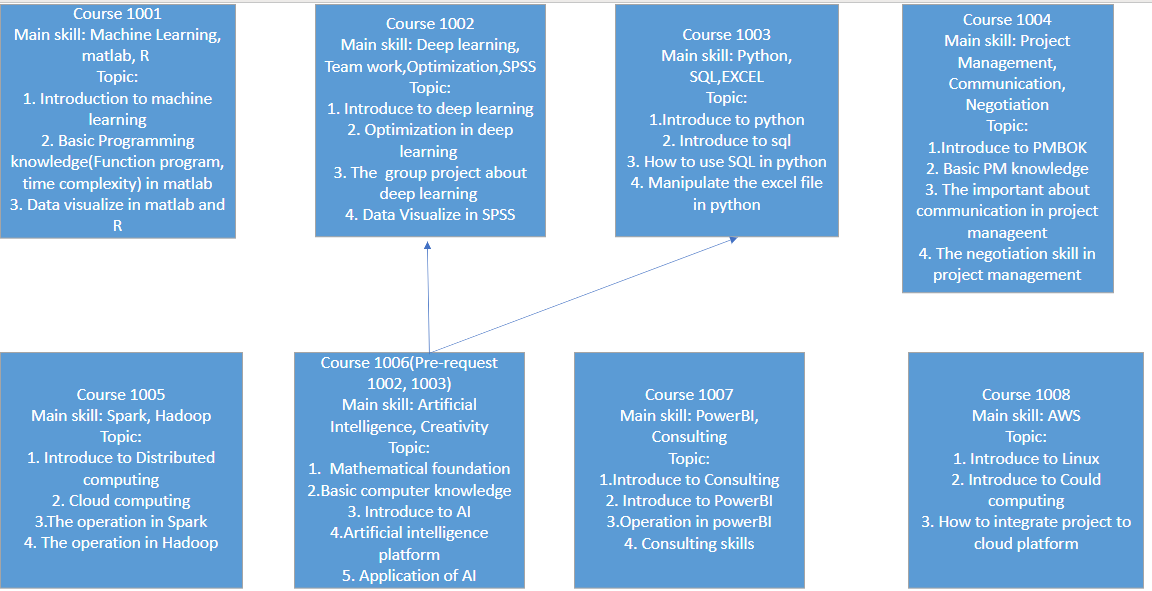